In [1]:
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# path variables

base_path = "/content/drive/My Drive/RESEARCH/2020/Pedestrian_prediction_simposio/"


In [4]:

ground_truth = "/content/drive/My Drive/RESEARCH/2020/Pedestrian_prediction_simposio/data/pruebas-imagenes/students001.txt"
predicted_0 = "/content/drive/My Drive/RESEARCH/2020/Pedestrian_prediction_simposio/data/pruebas-imagenes/0/students001.txt.out"
predicted_128 = "/content/drive/My Drive/RESEARCH/2020/Pedestrian_prediction_simposio/data/pruebas-imagenes/128/students001.txt.out"
predicted_256 = "/content/drive/My Drive/RESEARCH/2020/Pedestrian_prediction_simposio/data/pruebas-imagenes/256/students001.txt.out"
predicted_512 = "/content/drive/My Drive/RESEARCH/2020/Pedestrian_prediction_simposio/data/pruebas-imagenes/512/students001.txt.out"


In [5]:
import pandas as pd

# Create an empty Dataframe without any column names, indices or data
dataframe_gt = pd.read_csv(ground_truth, sep=' ',header=None, names = ['time','id', 'x', 'y'])
dataframe_pred_0 = pd.read_csv(predicted_0, sep=' ',header=None, names = ['time','id', 'x', 'y'])
dataframe_pred_128 = pd.read_csv(predicted_128, sep=' ',header=None, names = ['time','id', 'x', 'y'])
dataframe_pred_256 = pd.read_csv(predicted_256, sep=' ',header=None, names = ['time','id', 'x', 'y'])
dataframe_pred_512 = pd.read_csv(predicted_512, sep=' ',header=None, names = ['time','id', 'x', 'y'])


In [6]:
import math

def l2_distance(gx,px,gy,py):
     return math.sqrt (((px - gx) ** 2) + ((py - gy) ** 2))

In [170]:
total_mean = 0

for row in range(0, len(dataframe_gt.index)):
    total_mean += l2_distance(dataframe_gt.iloc[row,:].x,dataframe_pred.iloc[row,:].x,dataframe_gt.iloc[row,:].y,dataframe_pred.iloc[row,:].y)

total_mean = total_mean / len(dataframe_gt.index)

total_final = 0

for row in range(19,len(dataframe_gt.index),20):
    total_final += l2_distance(dataframe_gt.iloc[row,:].x,dataframe_pred.iloc[row,:].x,dataframe_gt.iloc[row,:].y,dataframe_pred.iloc[row,:].y)

total_final = total_final / (len(dataframe_gt.index)/20)

print("total mean distance: {:f} \n".format(total_mean))
print("total final displacement: {:f} \n".format(total_final))


total mean distance: 0.482743 

total final displacement: 1.398008 



In [7]:
_gt = dataframe_gt.groupby(['id'])
_pred_0 = dataframe_pred_0.groupby(['id'])
_pred_128 = dataframe_pred_128.groupby(['id'])
_pred_256 = dataframe_pred_256.groupby(['id'])
_pred_512 = dataframe_pred_512.groupby(['id'])


Point mean distance error:  0.3067383797251816
Point final displacement error:  1.0548677642245026
Point mean distance error:  0.13863877387269236
Point final displacement error:  0.01004987562112071
Point mean distance error:  0.12086243374651759
Point final displacement error:  0.516400038729666
Point mean distance error:  0.12647359936062702
Point final displacement error:  0.5375295340723143


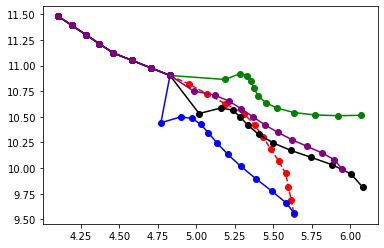

In [8]:
import matplotlib.pyplot as plt


pedestrian = 52  #184,195

gx = _gt.get_group(pedestrian).x
gy = _gt.get_group(pedestrian).y

px_0 = _pred_0.get_group(pedestrian).x
py_0 = _pred_0.get_group(pedestrian).y

px_128 = _pred_128.get_group(pedestrian).x
py_128 = _pred_128.get_group(pedestrian).y

px_256 = _pred_256.get_group(pedestrian).x
py_256 = _pred_256.get_group(pedestrian).y

px_512 = _pred_512.get_group(pedestrian).x
py_512 = _pred_512.get_group(pedestrian).y



gx = gx.to_numpy()
gy = gy.to_numpy()

px_0 = px_0.to_numpy()
py_0 = py_0.to_numpy()

px_128 = px_128.to_numpy()
py_128 = py_128.to_numpy()

px_256 = px_256.to_numpy()
py_256 = py_256.to_numpy()

px_512 = px_512.to_numpy()
py_512 = py_512.to_numpy()



def print_metrics(gx, gy, px,py ):
    single_l2_distance = 0

    for i in range (0,20):
        single_l2_distance += l2_distance(gx[i],px[i],gy[i],py[i])

    single_l2_distance = single_l2_distance / 20

    single_final_displacement = l2_distance(gx[19],px[19],gy[19],py[19])

    print ("Point mean distance error: ",single_l2_distance)
    print("Point final displacement error: ", single_final_displacement)


print_metrics(gx,gy,px_0,py_0)
print_metrics(gx,gy,px_128,py_128)
print_metrics(gx,gy,px_256,py_256)
print_metrics(gx,gy,px_512,py_512)


# Get current size
#fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
#fig_size[0] = 12
#fig_size[1] = 9
#plt.rcParams["figure.figsize"] = fig_size
    
    
#img = plt.imread(base_path+"data/background/bookstore_video0.jpg")
fig, ax = plt.subplots()
    
#x = range(300)
#ax.imshow(img, extent=[0, 400, 0, 300])
#ax.imshow(img)    
#ax.style.use('seaborn-whitegrid')
ax.plot(gx,gy,'-o',color='red',linestyle='dashed')
ax.plot(px_0,py_0,'-o',color='green',)
ax.plot(px_128,py_128,'-o',color='blue',)
ax.plot(px_256,py_256,'-o',color='black',)
ax.plot(px_512,py_512,'-o',color='purple',)

plt.show()
